# Plot the data for further exploration

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def abbreviate_number(num):
    """Format large numbers into abbreviated form (e.g., 1,000,000 -> 1.0M)."""
    if np.isnan(num) or num is None:
        return '0'
    abs_num = abs(num)
    if abs_num >= 1e6:
        return f"{num / 1e6:.1f}M"
    if abs_num >= 1e3:
        return f"{num / 1e3:.1f}K"
    return f"{num:.1f}"

## Scatter Plot of avg_expandEvts vs. final_expandEvts
This function creates a scatter plot showing the correlation between avg_expandEvts and final_expandEvts, colored by censored status, using a logarithmic scale.

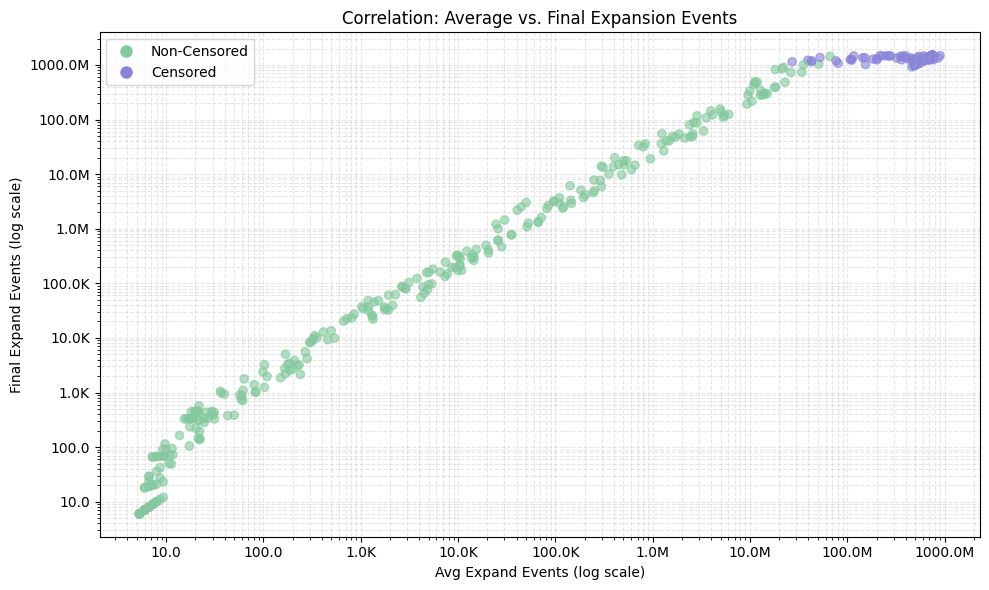

In [5]:
def plot_avg_vs_final_expand_events(file_path):
    """
    Create a scatter plot of avg_expandEvts vs final_expandEvts, colored by censored status.
    
    Parameters:
    file_path (str): Path to structured_data.xlsx
    """
    # Load and clean data
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df = df.dropna(subset=['avg_expandEvts', 'final_expandEvts', 'censored'])
    df['avg_expandEvts'] = pd.to_numeric(df['avg_expandEvts'], errors='coerce').fillna(0)
    df['final_expandEvts'] = pd.to_numeric(df['final_expandEvts'], errors='coerce').fillna(0)
    df['censored'] = pd.to_numeric(df['censored'], errors='coerce').fillna(0)
    df = df[df['final_expandEvts'] > 0]  # Filter out zero or invalid values
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    colors = df['censored'].map({0: '#82ca9d', 1: '#8884d8'})  # Green for non-censored, purple for censored
    plt.scatter(df['avg_expandEvts'], df['final_expandEvts'], c=colors, alpha=0.6)
    
    # Set logarithmic scales
    plt.xscale('log')
    plt.yscale('log')
    
    # Customize axes
    plt.xlabel('Avg Expand Events (log scale)')
    plt.ylabel('Final Expand Events (log scale)')
    plt.title('Correlation: Average vs. Final Expansion Events')
    
    # Add custom tick formatter
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: abbreviate_number(x)))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Non-Censored', markerfacecolor='#82ca9d', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Censored', markerfacecolor='#8884d8', markersize=10)
    ]
    plt.legend(handles=legend_elements)
    
    # Add grid
    plt.grid(True, which="both", ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_avg_vs_final_expand_events("structured_data.xlsx")

## Bar Chart of Mean final_expandEvts by n
This function creates a bar chart showing the mean final_expandEvts for each problem size n.

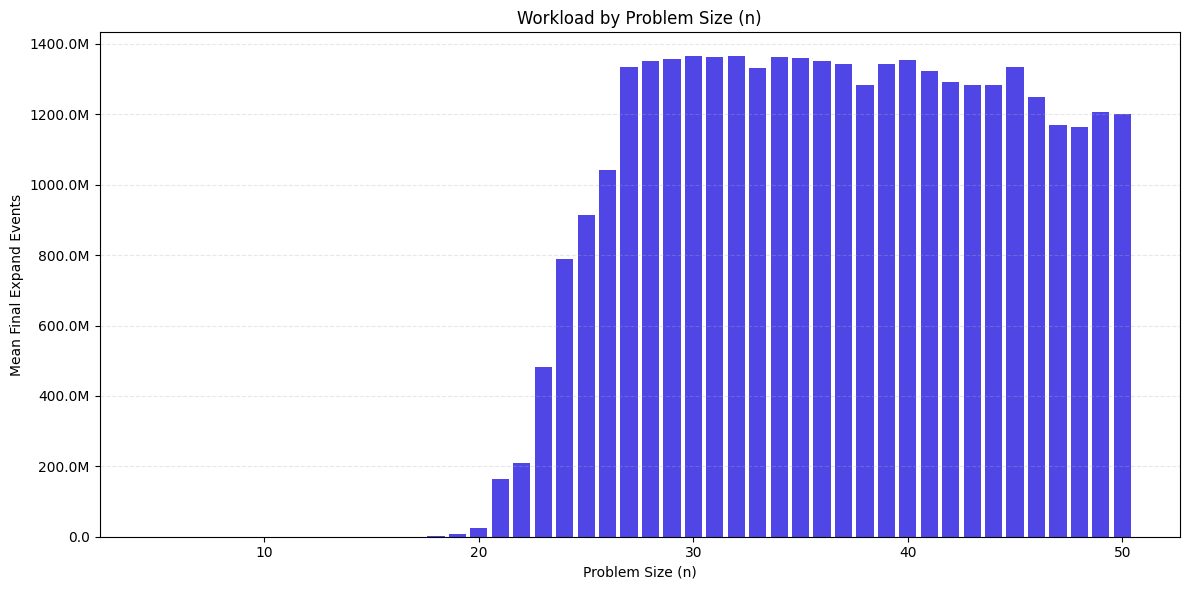

In [7]:
def plot_workload_by_n(file_path):
    """
    Create a bar chart of mean final_expandEvts by problem size (n).
    
    Parameters:
    file_path (str): Path to structured_data.xlsx
    """
    # Load and clean data
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['n'] = pd.to_numeric(df['n'], errors='coerce').fillna(0)
    df['final_expandEvts'] = pd.to_numeric(df['final_expandEvts'], errors='coerce').fillna(0)
    df = df[df['final_expandEvts'] > 0]  # Filter out zero or invalid values
    
    # Aggregate data by n
    aggregated = df.groupby('n')['final_expandEvts'].mean().reset_index()
    aggregated = aggregated.sort_values('n')
    
    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(aggregated['n'], aggregated['final_expandEvts'], color='#4f46e5')
    
    # Customize axes
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Mean Final Expand Events')
    plt.title('Workload by Problem Size (n)')
    
    # Add custom tick formatter for y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))
    
    # Add grid
    plt.grid(True, which="major", axis='y', ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_workload_by_n("structured_data.xlsx")

## Scatter Plot of n vs. final_expandEvts
This function creates a scatter plot showing final_expandEvts vs. problem size n, using a logarithmic scale for the y-axis.

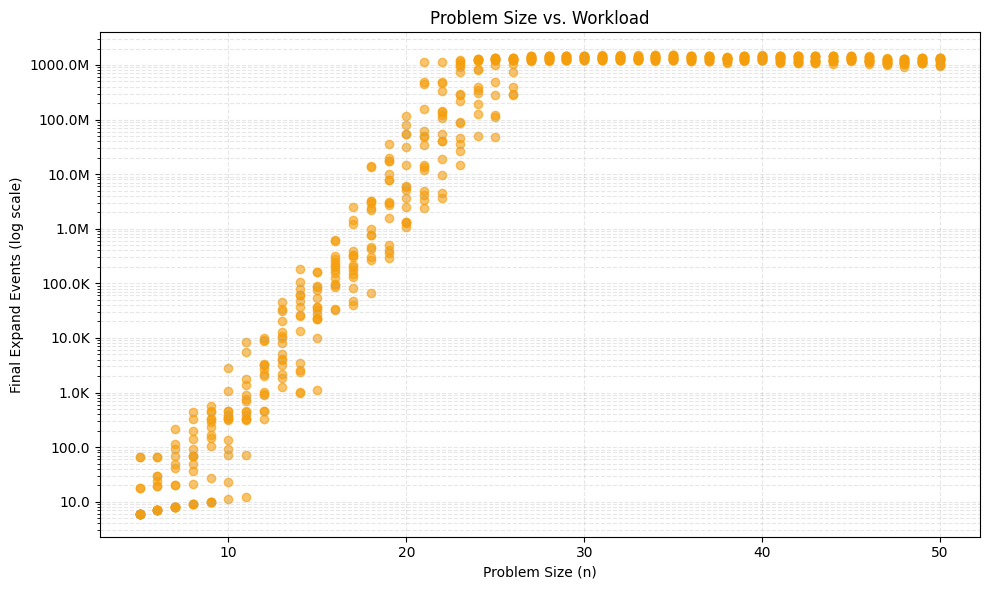

In [9]:
def plot_n_vs_final_expand_events(file_path):
    """
    Create a scatter plot of problem size (n) vs final_expandEvts.
    
    Parameters:
    file_path (str): Path to structured_data.xlsx
    """
    # Load and clean data
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['n'] = pd.to_numeric(df['n'], errors='coerce').fillna(0)
    df['final_expandEvts'] = pd.to_numeric(df['final_expandEvts'], errors='coerce').fillna(0)
    df = df[df['final_expandEvts'] > 0]  # Filter out zero or invalid values
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['n'], df['final_expandEvts'], color='#f59e0c', alpha=0.6)
    
    # Set logarithmic scale for y-axis
    plt.yscale('log')
    
    # Customize axes
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Final Expand Events (log scale)')
    plt.title('Problem Size vs. Workload')
    
    # Add custom tick formatter for y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))
    
    # Add grid
    plt.grid(True, which="both", ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_n_vs_final_expand_events("structured_data.xlsx")

Pie chart saved to plots/solver_outcome_pie_chart.png


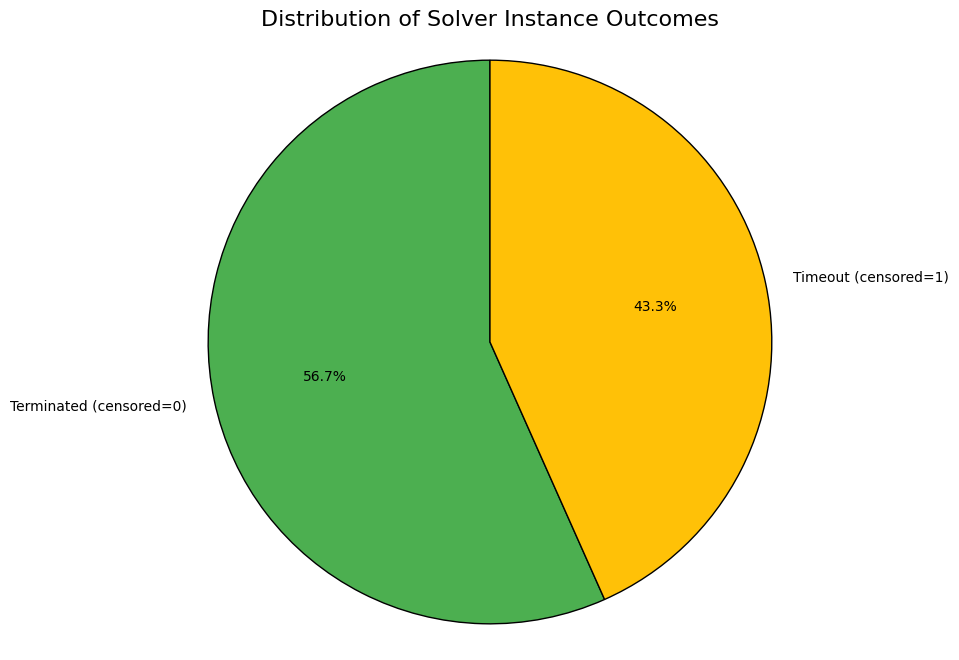

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_timeout_pie_chart(data_path="structured_data.xlsx", output_dir="plots"):
    """
    Generates and saves a pie chart showing the ratio of timeout vs. terminated instances.

    Parameters:
    - data_path (str): Path to the preprocessed Excel file containing the 'censored' column.
    - output_dir (str): Directory to save the generated plot.
    """
    try:
        # Load the data
        df = pd.read_excel(data_path)

        # Ensure the 'censored' column exists
        if 'censored' not in df.columns:
            print(f"Error: 'censored' column not found in {data_path}")
            return

        # Count the occurrences of each category (0 for terminated, 1 for timeout)
        counts = df['censored'].value_counts()

        # Define labels for the pie chart slices
        labels = ['Terminated (censored=0)', 'Timeout (censored=1)']

        # Define colors for the slices
        colors = ['#4CAF50', '#FFC107'] # Green for terminated, Amber for timeout

        # Create the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                wedgeprops={'edgecolor': 'black'})

        # Add a title
        plt.title('Distribution of Solver Instance Outcomes', fontsize=16)

        # Ensure equal aspect ratio ensures that pie is drawn as a circle.
        plt.axis('equal')

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        output_filepath = os.path.join(output_dir, "solver_outcome_pie_chart.png")

        # Save the plot
        plt.savefig(output_filepath, bbox_inches='tight')
        print(f"Pie chart saved to {output_filepath}")

        # Display the plot (optional, for direct viewing)
        plt.show()

    except FileNotFoundError:
        print(f"Error: Data file not found at {data_path}. Please ensure the file exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# Make sure 'structured_data.xlsx' is in the same directory or provide the full path
plot_timeout_pie_chart()

Scatter plot saved to plots/max_stack_depth_vs_workload.png


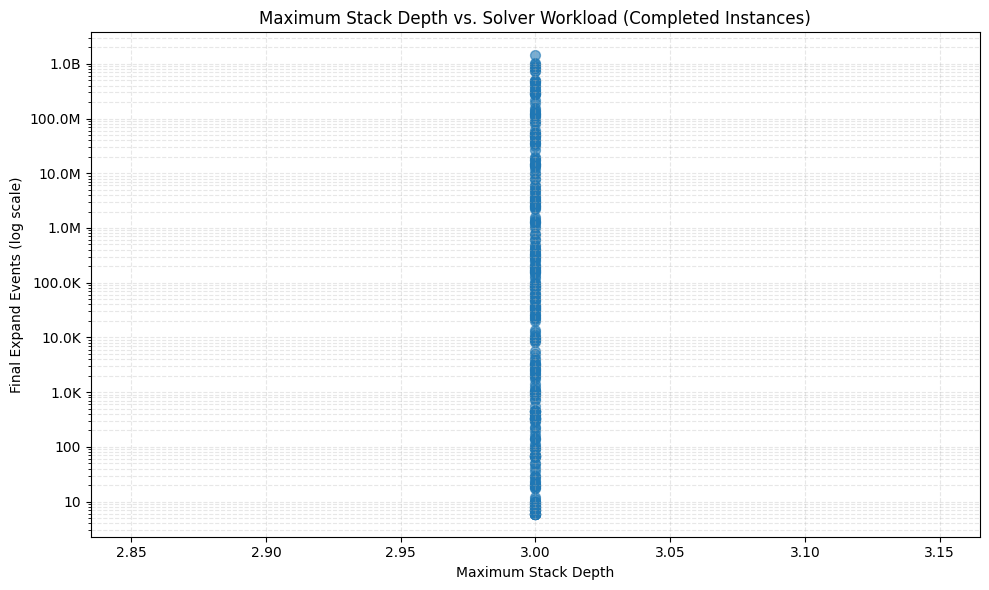

In [6]:
def abbreviate_number(num):
    """
    Formats large numbers into abbreviated form (e.g., 1,000,000 -> 1.0M).
    Handles NaN values by returning '0'.
    """
    if np.isnan(num) or num is None:
        return '0'
    abs_num = abs(num)
    if abs_num >= 1e12:
        return f'{num / 1e12:.1f}T'
    elif abs_num >= 1e9:
        return f'{num / 1e9:.1f}B'
    elif abs_num >= 1e6:
        return f'{num / 1e6:.1f}M'
    elif abs_num >= 1e3:
        return f'{num / 1e3:.1f}K'
    return str(int(num))

def plot_max_stack_depth_vs_workload(data_path="structured_data.xlsx", output_dir="plots"):
    """
    Generates and saves a scatter plot of maxStackDepth vs. final_expandEvts.

    Parameters:
    - data_path (str): Path to the preprocessed Excel file.
    - output_dir (str): Directory to save the generated plot.
    """
    try:
        # Load the data
        df = pd.read_excel(data_path)

        # Filter for completed instances (censored=0) as final_expandEvts is meaningful here
        df_completed = df[df['censored'] == 0].copy()

        # Ensure necessary columns exist
        required_cols = ['maxStackDepth_1', 'final_expandEvts']
        if not all(col in df_completed.columns for col in required_cols):
            print(f"Error: Missing one or more required columns ({required_cols}) in the filtered DataFrame.")
            return

        # Create scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(df_completed['maxStackDepth_1'], df_completed['final_expandEvts'],
                    color='#1f77b4', alpha=0.6, s=50) # Using a standard blue color

        # Set logarithmic scale for y-axis
        plt.yscale('log')

        # Customize axes
        plt.xlabel('Maximum Stack Depth')
        plt.ylabel('Final Expand Events (log scale)')
        plt.title('Maximum Stack Depth vs. Solver Workload (Completed Instances)')

        # Add custom tick formatter for y-axis
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))

        # Add grid
        plt.grid(True, which="both", ls="--", alpha=0.3)

        plt.tight_layout()

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        output_filepath = os.path.join(output_dir, "max_stack_depth_vs_workload.png")

        # Save the plot
        plt.savefig(output_filepath, bbox_inches='tight')
        print(f"Scatter plot saved to {output_filepath}")

        # Display the plot (optional, for direct viewing)
        plt.show()

    except FileNotFoundError:
        print(f"Error: Data file not found at {data_path}. Please ensure the file exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# Make sure 'structured_data.xlsx' is in the same directory or provide the full path
plot_max_stack_depth_vs_workload()

Box plot saved to plots/k_vs_workload_boxplot.png


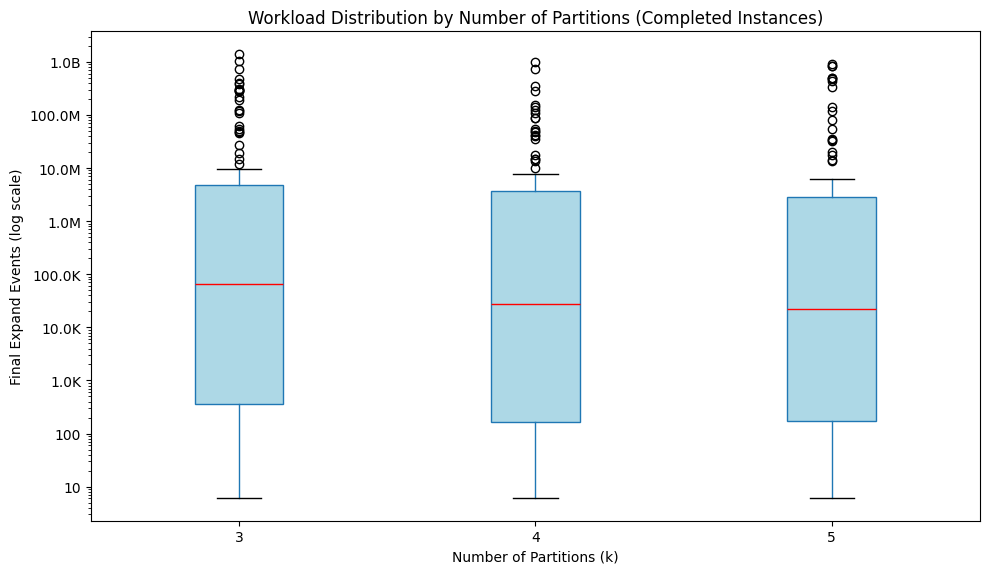

In [7]:
def abbreviate_number(num):
    """
    Formats large numbers into abbreviated form (e.g., 1,000,000 -> 1.0M).
    Handles NaN values by returning '0'.
    """
    if np.isnan(num) or num is None:
        return '0'
    abs_num = abs(num)
    if abs_num >= 1e12:
        return f'{num / 1e12:.1f}T'
    elif abs_num >= 1e9:
        return f'{num / 1e9:.1f}B'
    elif abs_num >= 1e6:
        return f'{num / 1e6:.1f}M'
    elif abs_num >= 1e3:
        return f'{num / 1e3:.1f}K'
    return str(int(num))

def plot_k_vs_workload(data_path="structured_data.xlsx", output_dir="plots"):
    """
    Generates and saves a box plot of Number of Partitions (k) vs. final_expandEvts.

    Parameters:
    - data_path (str): Path to the preprocessed Excel file.
    - output_dir (str): Directory to save the generated plot.
    """
    try:
        # Load the data
        df = pd.read_excel(data_path)

        # Filter for completed instances (censored=0) as final_expandEvts is meaningful here
        df_completed = df[df['censored'] == 0].copy()

        # Ensure necessary columns exist
        required_cols = ['k', 'final_expandEvts']
        if not all(col in df_completed.columns for col in required_cols):
            print(f"Error: Missing one or more required columns ({required_cols}) in the filtered DataFrame.")
            return

        # Convert 'k' to a categorical type for proper plotting
        df_completed['k'] = df_completed['k'].astype('category')

        # Create box plot
        plt.figure(figsize=(10, 6))
        # Use boxplot to show distribution for each k
        df_completed.boxplot(column='final_expandEvts', by='k', ax=plt.gca(),
                             grid=False, patch_artist=True,
                             boxprops=dict(facecolor='#ADD8E6', color='#1f77b4'),
                             medianprops=dict(color='red'))

        # Set logarithmic scale for y-axis
        plt.yscale('log')

        # Customize axes and title
        plt.xlabel('Number of Partitions (k)')
        plt.ylabel('Final Expand Events (log scale)')
        plt.title('Workload Distribution by Number of Partitions (Completed Instances)')
        plt.suptitle('') # Suppress the default suptitle created by boxplot

        # Add custom tick formatter for y-axis
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))

        plt.tight_layout()

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        output_filepath = os.path.join(output_dir, "k_vs_workload_boxplot.png")

        # Save the plot
        plt.savefig(output_filepath, bbox_inches='tight')
        print(f"Box plot saved to {output_filepath}")

        # Display the plot (optional, for direct viewing)
        plt.show()

    except FileNotFoundError:
        print(f"Error: Data file not found at {data_path}. Please ensure the file exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# Make sure 'structured_data.xlsx' is in the same directory or provide the full path
plot_k_vs_workload()

Bar chart saved to plots/n_distribution_of_timeouts.png


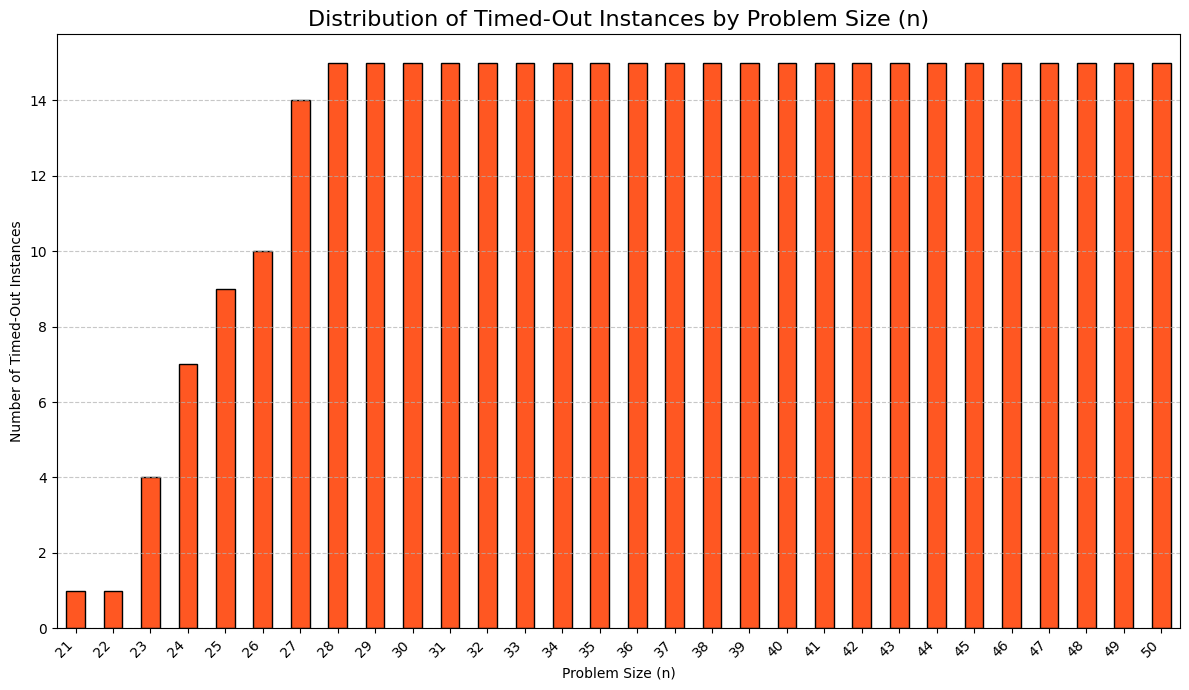

In [8]:
def plot_n_distribution_of_timeouts(data_path="structured_data.xlsx", output_dir="plots"):
    """
    Generates and saves a bar chart showing the distribution of timed-out (censored=1)
    instances by their problem size (n).

    Parameters:
    - data_path (str): Path to the preprocessed Excel file containing 'n' and 'censored' columns.
    - output_dir (str): Directory to save the generated plot.
    """
    try:
        # Load the data
        df = pd.read_excel(data_path)

        # Filter for timed-out instances (censored=1)
        df_timeouts = df[df['censored'] == 1].copy()

        # Ensure the 'n' column exists
        if 'n' not in df_timeouts.columns:
            print(f"Error: 'n' column not found in the filtered DataFrame (timed-out instances).")
            return

        # Count the occurrences of each 'n' value for timed-out instances
        n_counts = df_timeouts['n'].value_counts().sort_index()

        # Create the bar chart
        plt.figure(figsize=(12, 7))
        n_counts.plot(kind='bar', color='#FF5722', edgecolor='black') # Orange color for timeouts

        # Customize axes and title
        plt.xlabel('Problem Size (n)')
        plt.ylabel('Number of Timed-Out Instances')
        plt.title('Distribution of Timed-Out Instances by Problem Size (n)', fontsize=16)

        # Add grid for readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Rotate x-axis labels if necessary for readability
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        output_filepath = os.path.join(output_dir, "n_distribution_of_timeouts.png")

        # Save the plot
        plt.savefig(output_filepath, bbox_inches='tight')
        print(f"Bar chart saved to {output_filepath}")

        # Display the plot (optional, for direct viewing)
        plt.show()

    except FileNotFoundError:
        print(f"Error: Data file not found at {data_path}. Please ensure the file exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# Make sure 'structured_data.xlsx' is in the same directory or provide the full path
plot_n_distribution_of_timeouts()